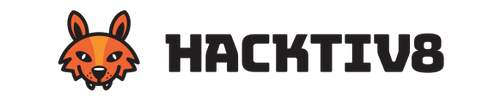

# Assignment 1 - Data Visualization with Python

Naurah Nadzifah Azizi

PYTN-KS11-003

## Project Overview

### London Crime Data, 2008-2016
Source: https://www.kaggle.com/datasets/jboysen/london-crime

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:
* lsoa_code: code for Lower Super Output Area in Greater London.
* borough: Common name for London borough.
* major_category: High level categorization of crime
* minor_category: Low level categorization of crime within major category.
* value: monthly reported count of categorical crime in given borough
* year: Year of reported counts, 2008-2016
* month: Month of reported counts, 1-12

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:
* What is the change in the number of crime incidents from 2011 to 2016?
* What were the top 3 crimes per borough in 2016?

### Import Library

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium

### Import Dataset

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')

### Exploratory Data Analysis

View the top 5 rows of data

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


View the bottom 5 rows of data

In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


View all columns and their data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


View the header list

In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

View index list

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

View the number of data rows and columns

In [8]:
df.shape

(13490604, 7)

In this data, there are 13490604 rows and 7 columns

View descriptive statistics of each column with integer/float data type

In [9]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


View descriptive statistics of each column with object data type

In [10]:
df[['lsoa_code','borough','major_category','minor_category']].describe()

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


Check Missing Value

In [11]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Check Duplicate Data

In [12]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

View the unique value in the borough column

In [13]:
df.borough.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

View the unique value in the major_category column

In [14]:
df.major_category.unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

View the unique value in the minor_category column

In [15]:
df.minor_category.unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

View the unique value in the value column

In [16]:
df.value.unique()

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
         8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,
        21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,
        40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,
        51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55,
        81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,
       241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86,
        52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98,
        92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,
       131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,
       144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,
        85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,
       129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,
       244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 13

View the unique value in the year column

In [17]:
df.year.unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

View the unique in the month column

In [18]:
df.month.unique()

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2], dtype=int64)

### Pre-processing & Visualization

#### Line Plot

**Question:** How many crimes occurred in 2008-2016?

Create a pivot table that shows the total number of values of the 'value' column grouped by the 'year' of the 'df' DataFrame

In [19]:
year = df.pivot_table(index='year', values='value', aggfunc='sum')
year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Create a line plot

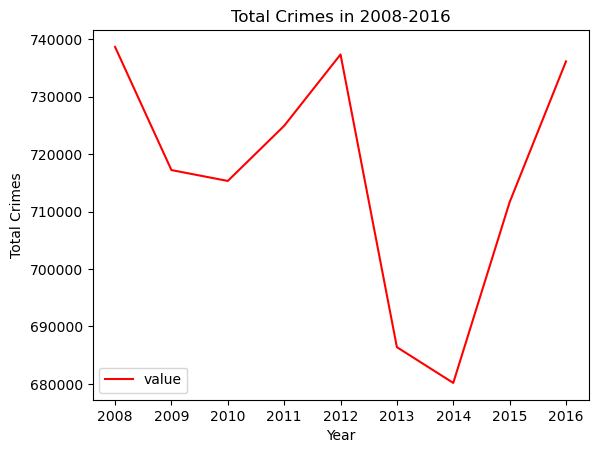

In [20]:
year.plot(kind='line',color='red')

plt.title('Total Crimes in 2008-2016')
plt.ylabel('Total Crimes')
plt.xlabel('Year')

plt.show()

From the line plot above, it can be seen that the highest crime cases occurred in 2008, 2012, and 2016. There was also a drastic decline in 2013

#### Area Plot

**Question:** Which 5 boroughs had the most crime in 2008-2016?

Create a pivot table showing the total number of 'value' column values grouped by 'borough' and 'year' from DataFrame 'df', Add a new column 'total' to the DataFrame 'area', then sort the DataFrame based on the value of the column 'total', and retrieve the top 5 rows of the sorted DataFrame

In [21]:
area = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
area['total'] = area.sum(axis=1)
area_sort = area.sort_values(['total'], ascending=False)
area_sort5 = area_sort.head()
area_sort5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


Transpose the DataFrame 'area_sort5' and delete the row labeled 'total' from the DataFrame 'arr'

In [22]:
arr = area_sort5.T
area_plot = arr.drop('total',axis=0)
area_plot

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


Create a plot area

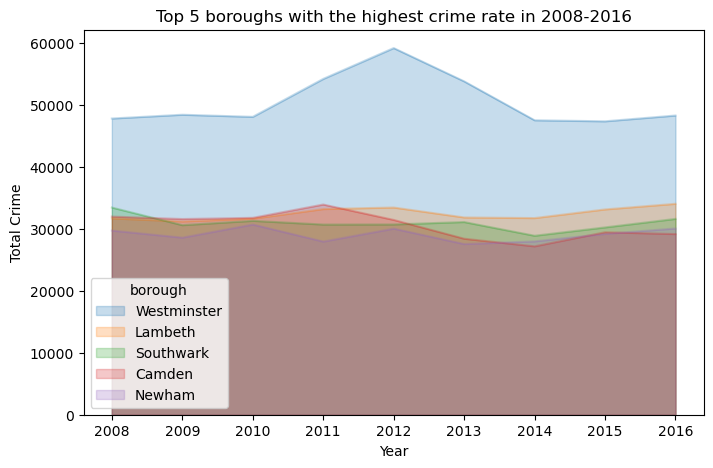

In [23]:
area_plot.plot(kind='area', alpha=0.25, stacked=False, figsize=(8,5))
plt.title('Top 5 boroughs with the highest crime rate in 2008-2016')
plt.ylabel('Total Crime')
plt.xlabel('Year')
plt.show()

From the area plots, it can be seen that Westminster has the highest crime rate compared to other areas, with a peak in 2012

#### Histogram

**Question:** What was the frequency of crime in Westminster, Lambeth and Southwark in 2008-2016?

Create a pivot table showing the total number of 'value' column values grouped by 'borough' and 'year' from DataFrame 'df', Add a new column 'total' to the DataFrame 'hist', then sort the DataFrame based on the value of the column 'total', and retrieve the top 3 rows of the sorted DataFrame

In [24]:
hist = df.pivot_table(index='borough',columns='year',values='value',aggfunc='sum')
hist['total'] = hist.sum(axis=1)
hist.sort_values(['total'], ascending=False, axis=0, inplace=True)
hist_top3 = hist.head(3)
hist_top3

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809


Transpose the DataFrame 'hist_top3' and delete the row labeled 'total' from the DataFrame 'hist_t'

In [25]:
hist_t = hist_top3.T
hist_plot = hist_t.drop('total',axis=0)
hist_plot

borough,Westminster,Lambeth,Southwark
year,,,
2008,47846,31717,33470
2009,48456,31225,30623
2010,48116,31671,31320
2011,54243,33224,30723
2012,59226,33473,30737
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


Create a histogram plot

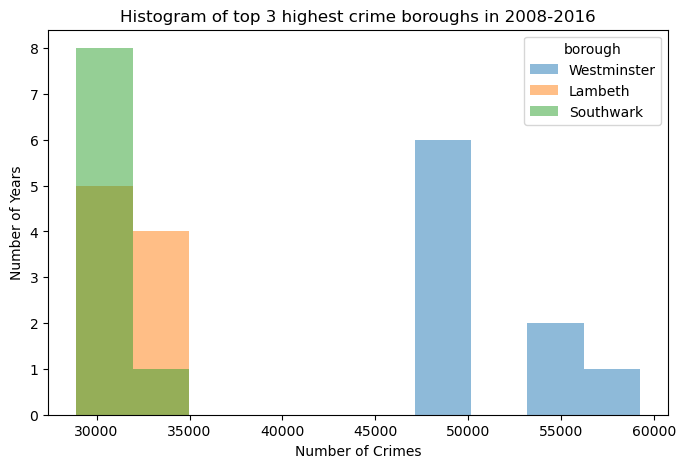

In [26]:
hist_plot.plot(kind='hist',figsize=(8,5),alpha=0.5)
plt.title('Histogram of top 3 highest crime boroughs in 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')
plt.show()

From the histogram, it can be seen that the frequency distribution in Westminster tends to be spread out compared to Lambeth and Southwark

#### Bar Chart

**Question:** What was the total crime in 2008-2016 in top 10 borough?

Create a pivot table showing the total number of 'value' column values grouped by 'borough' and 'year' from DataFrame 'df', Add a new column 'total' to the DataFrame 'bc', then sort the DataFrame based on the value of the column 'total', and retrieve the top 10 rows of the sorted DataFrame

In [27]:
bc = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
bc['Total'] = bc.sum(axis=1)
bc.sort_values(['Total'], ascending=False, axis=0, inplace=True)
bc_top10 = bc['Total'].head(10)
bc_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: Total, dtype: int64

Create a horizontal bar chart

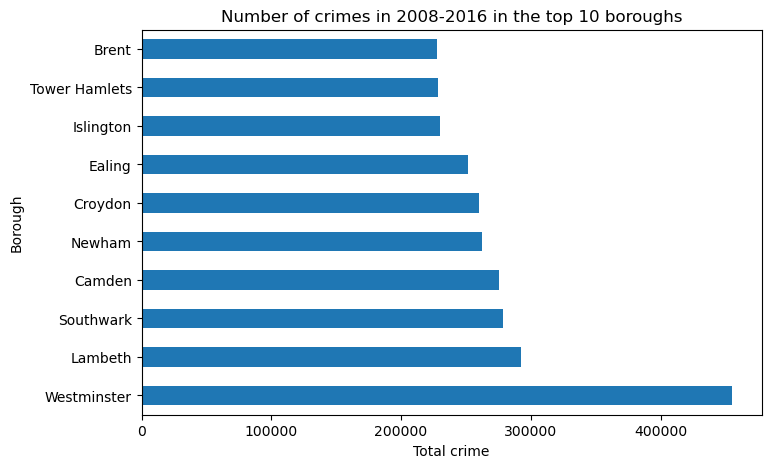

In [28]:
bc_top10.plot(kind='barh', figsize=(8,5))
plt.title('Number of crimes in 2008-2016 in the top 10 boroughs')
plt.xlabel('Total crime')
plt.ylabel('Borough')
plt.show()

From the bar chart above, it can be seen that the highest crime rate is in the borough of Westminster. Then followed by Lambeth, Southwark, Camden, Newham, Croydon, Ealing, Islington, Tower Hamlets, and Brenth. These are the 10 highest crime areas in the City of London

#### Pie Chart

**Question:** What is the percentage of major category and minor category crimes in London?

Counts the number of occurrences of each unique value in the 'major_category' column of DataFrame 'df', then saves the result into a new Series named 'pc'

In [29]:
pc = df['major_category'].value_counts()

Create a Pie Chart of major category

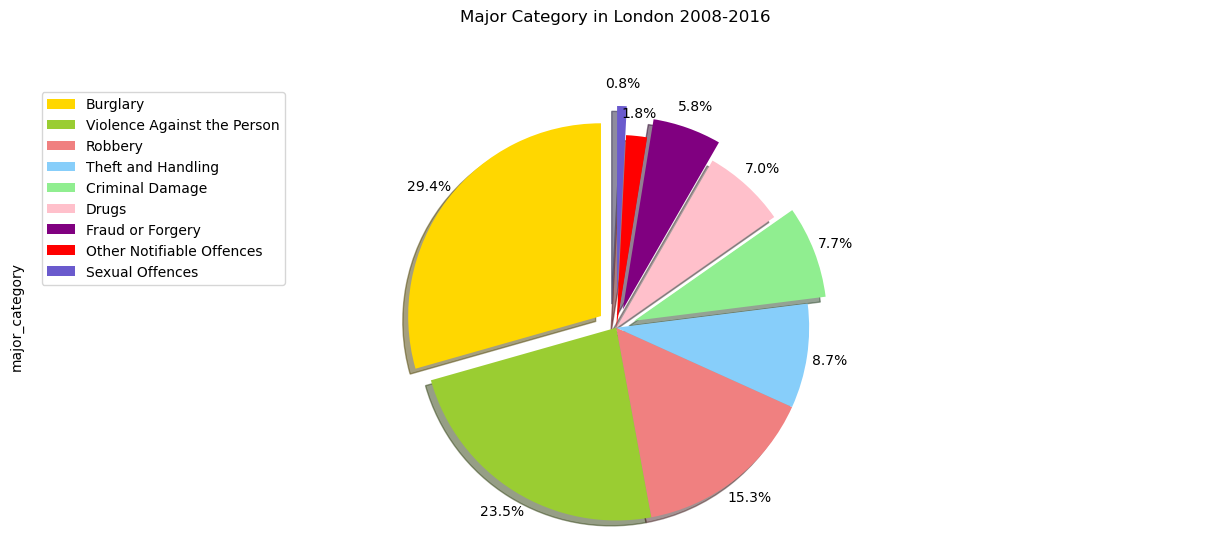

In [30]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','purple','red','slateblue']
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0.1, 0, 0.15]

pc.plot(kind='pie',
        figsize=(15,6),
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        labels=None,
        pctdistance=1.12,
        colors=colors_list,
        explode=explode_list)

plt.legend(labels=df['major_category'].unique(),loc='upper left')
plt.axis('equal')
plt.title('Major Category in London 2008-2016',y=1.12)
plt.show()

Counts the number of occurrences of each unique value in the 'minor_category' column of DataFrame 'df', then saves the result into a new Series named 'pc_minor'

In [31]:
pc_minor = df['minor_category'].value_counts()

Create a Pie Chart of minor category

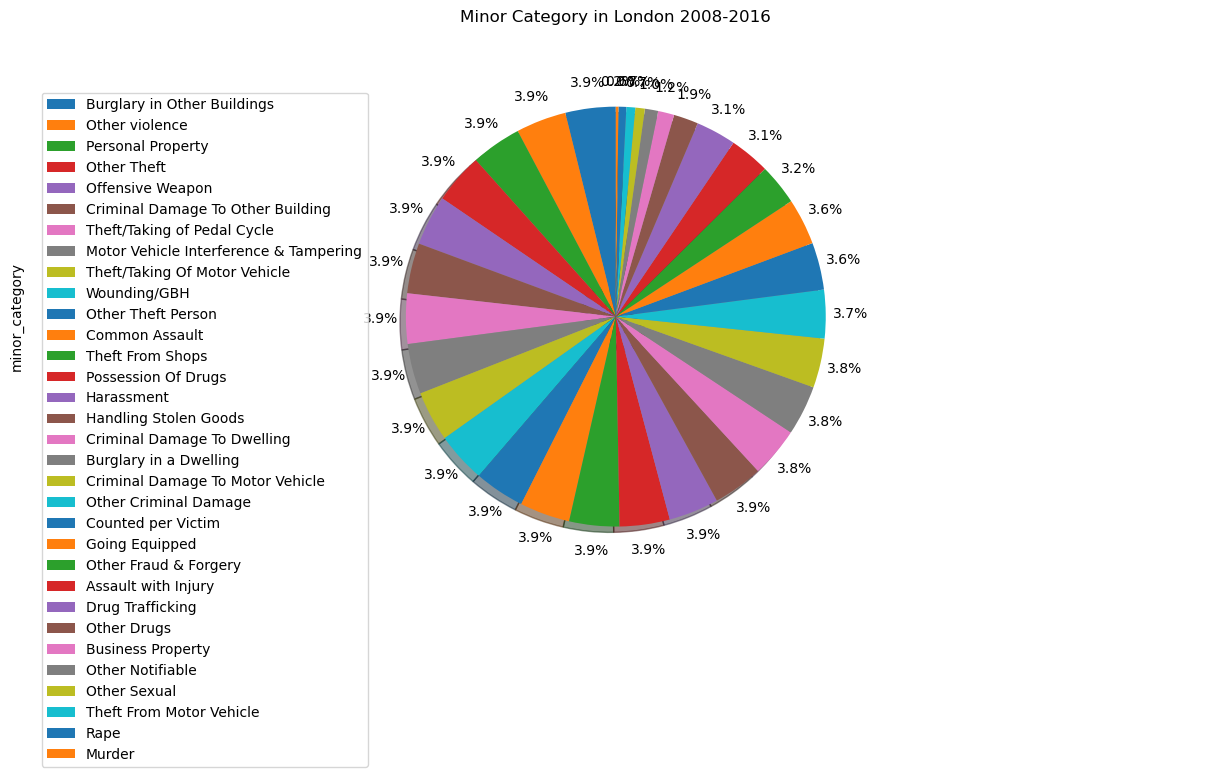

In [32]:
pc_minor.plot(kind='pie',
        figsize=(15,6),
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        labels=None,
        pctdistance=1.12)

plt.legend(labels=df['minor_category'].unique(),loc='upper left')
plt.axis('equal')
plt.title('Minor Category in London 2008-2016',y=1.12)
plt.show()

From the Pie Chart above, it can be seen that the highest Major Category percentage level is Burglary. As for the Minor Category, most of them have the same percentage level

#### Box Plot

**Question:** Compare the number of crimes in Camden and Newham

Retrieved the top 5 boroughs with the highest crime rate from the Area Plot

In [33]:
arr

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


Selects some data from DataFrame 'arr' and saves it into a new DataFrame 'box_plot', which will be used to create a box plot

In [34]:
box_plot = arr.iloc[:9,3:]
box_plot

borough,Camden,Newham
year,,
2008,32010,29752
2009,31612,28610
2010,31804,30728
2011,33956,27978
2012,31472,30067
2013,28435,27577
2014,27198,28005
2015,29477,29217
2016,29183,30090


Define descriptive statistics of Camden and Newham boroughs

In [35]:
box_plot.describe()

borough,Camden,Newham
count,9.000000,9.000000
mean,30571.888889,29113.777778
std,2121.547633,1119.162385
min,27198.000000,27577.000000
25%,29183.000000,28005.000000
50%,31472.000000,29217.000000
75%,31804.000000,30067.000000
max,33956.000000,30728.000000


Creat a box plot

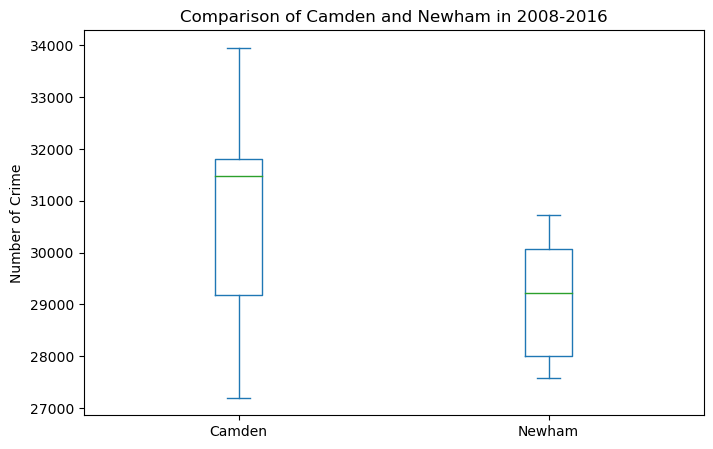

In [36]:
box_plot.plot(kind='box', figsize=(8,5))
plt.title('Comparison of Camden and Newham in 2008-2016')
plt.ylabel('Number of Crime')
plt.show()

Camden
1. The minimum number of crimes is around 27100, maximum number is around 33900, and median number of crimes is around 31400
2. 25% of the years for period 2008-2016 had an annual immigrant count of ~29100 or fewer 
3. 75% of the years for period 2008-2016 had an annual immigrant count of ~31800 of fewer

Newham
1. The minimum number of crimes is around 27500, maximum number is around 30700, and median number of crimes is around 29200
2. 25% of the years for period 2008-2016 had an annual immigrant count of ~28000 or fewer 
3. 75% of the years for period 2008-2016 had an annual immigrant count of ~30000 of fewer

From the box plot above, it can be seen that the comparison of the number of crimes in the boroughs of Camden and Newham has no outliers which means that the range of data is not too large or small from the rest of the data set

#### Scatter Plot

**Question:** Create a scatterplot of total crime in London from 2008-2016.

Retrieve total crime data from 2008-2016

In [37]:
year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Reset index year

In [38]:
sp_year = year.reset_index()
sp_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Create a scatterplot

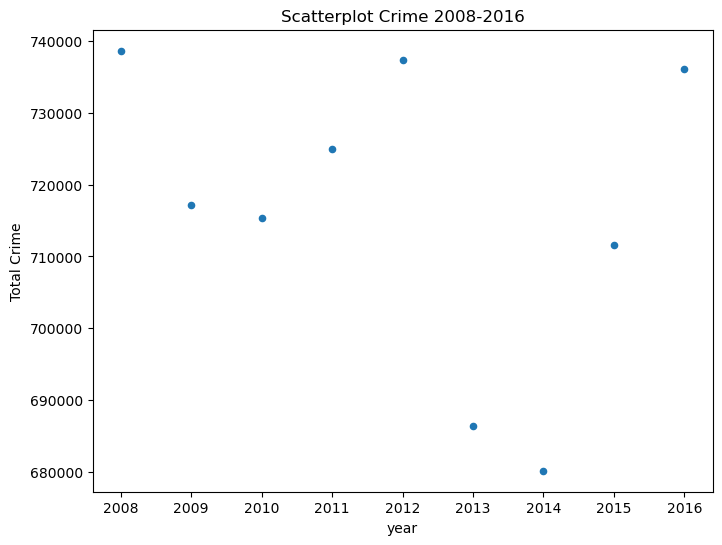

In [39]:
sp_year.plot(kind='scatter',x='year',y='value',figsize=(8,6))
plt.title('Scatterplot Crime 2008-2016')
plt.ylabel('Total Crime')
plt.show()

From the scatter plot above, it can be seen that the difference in the number of crimes between years is not very significant

#### WorldCloud

**Question:** What are the words that most frequently appear in major category crimes?

Selects the column 'major_category' from DataFrame 'df' and saves it into a new Series named 'mc_words'

In [40]:
mc_words = df['major_category']

Open a PNG image file with the filename 'map.png' using the Pillow (Python Imaging Library) module and convert it to a NumPy array

In [41]:
london_mask = np.array(Image.open('map.png'))

Display an image of the NumPy array 'london_mask' using the pyplot module of the Matplotlib library

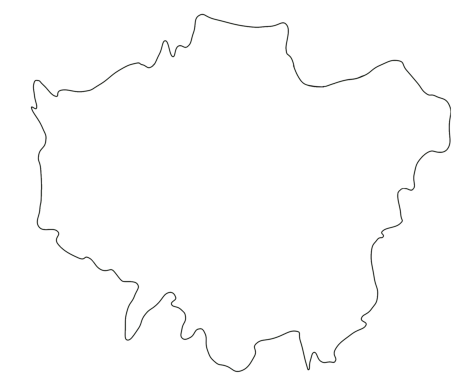

In [42]:
plt.imshow(london_mask,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Set stopwords

In [43]:
stopwords = set(STOPWORDS)

Create a word cloud

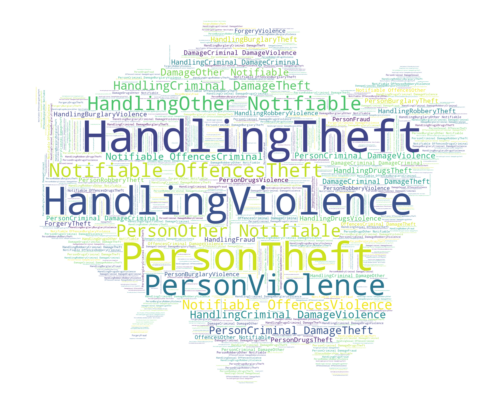

In [44]:
wc = WordCloud(background_color='white', max_words=2000, mask=london_mask, stopwords=stopwords)

#generate wordcloud
wc.generate(''.join(mc_words.values))
plt.figure(figsize=(8,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

From the Word Clouds above, it can be seen that Theft and Handling, and Violence Against the Person have the largest font size which means that these words appear frequently in the major category

#### Folium Maps

**Question:** Create folium maps with locations in London

Define the coordinates (latitude and longitude) of the map center at the beginning of the display

In [45]:
latitude = 51.507473
longitude = -0.125339

Create an interactive map centered at specific coordinates, defined by the values of the variables 'latitude' and 'longitude' using the Folium library, define the initial zoom level of the map, and define the map display type

In [46]:
london_map = folium.Map(location=[latitude,longitude],zoom_start=9,tiles='Stamen Terrain')
london_map

Create a new DataFrame with the coordinate information (latitude and longitude) of some London boroughs, stored in the variable 'df_borough'

In [47]:
borough = {
    'borough': ['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'],
    'latitude': [51.497329, 51.49352, 51.503234, 51.542815, 51.5300253],
    'longitude': [-0.135256, -0.001759, -0.086622, -0.159426, -0.0960187]
}

df_borough = pd.DataFrame(borough)
df_borough

,borough,latitude,longitude
0,Westminster,51.497329,-0.135256
1,Lambeth,51.493520,-0.001759
2,Southwark,51.503234,-0.086622
3,Camden,51.542815,-0.159426
4,Newham,51.530025,-0.096019


Creat a folium map

In [48]:
london = folium.Map(location=[latitude,longitude],zoom_start=11)
london
lm = folium.map.FeatureGroup()

# add 100 crimes to FeatueGroup
for lat,lon in zip(borough['latitude'],borough['longitude']):
    lm.add_child(
        folium.CircleMarker(
            [lat,lon],
            radius=5,
            color='red',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
london.add_child(lm)

The Folium Maps above visualize the geographical location of London and the boroughs of Westminster, Lambeth, Southwark, Camden, and Newham.

**Overall Analysis**

Based on London Crime data from 2008-2016, it was found that the highest number of crimes occurred in 2008, 2012, and 2016. Then the Westminster area is the highest area of crime where the peak occurred in 2012. The most common case is Burglary. The distribution of data for each year tends to be the same.